In [7]:
%load_ext autoreload
%autoreload 2
import torch 
from torch import nn
from omegaconf import OmegaConf
import torchvision
from ml_utilities.data.data_utils import calculate_dataset_mean_std, show_image_grid, show_images

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_dir = '/system/user/beck/pwbeck/data'

In [3]:
# datasets to download (only train sets)
# stanford cars, 
# food-101, 
# cifar100, 
# sun397,
# caltech256, 

In [4]:
# start with cifar100

# download cifar100
cf100 = torchvision.datasets.CIFAR100(data_dir, train=True, download=True, transform=torchvision.transforms.ToTensor())

Files already downloaded and verified


In [11]:
calculate_dataset_mean_std(cf100)

100%|██████████| 196/196 [00:05<00:00, 36.71it/s]


(tensor([0.5071, 0.4865, 0.4409]), tensor([0.2009, 0.1984, 0.2023]))

In [15]:
torchvision.datasets.CIFAR100.__name__

'CIFAR100'

In [26]:
def download_dataset_calc_normalizer(dataset_class, data_dir, train=True):
    try:
        dataset = dataset_class(data_dir, train=train, download=True, transform=torchvision.transforms.ToTensor())
    except TypeError:
        dataset = dataset_class(data_dir, split='train', download=True, transform=torchvision.transforms.ToTensor())
    mean, std = calculate_dataset_mean_std(dataset)
    normalizer_str = f"{dataset_class.__name__}_NORMALIZER = {{'mean': {mean.tolist()}, 'std': {std.tolist()}}}"
    return normalizer_str

In [37]:
ds_classes = [torchvision.datasets.Food101, torchvision.datasets.SUN397, torchvision.datasets.Flowers102]
# torchvision.datasets.CIFAR100, torchvision.datasets.StanfordCars, 
normalizer_strs = []
for ds_class in ds_classes:
    print(ds_class)
    normalizer_strs.append(download_dataset_calc_normalizer(ds_class, data_dir))

<class 'torchvision.datasets.food101.Food101'>


  0%|          | 0/4996278331 [00:00<?, ?it/s]

Extracting /system/user/beck/pwbeck/data/food-101.tar.gz to /system/user/beck/pwbeck/data
  0%|          | 0/296 [00:02<?, ?it/s]


RuntimeError: stack expects each tensor to be equal size, but got [3, 512, 512] at entry 0 and [3, 384, 512] at entry 3

In [36]:
print(normalizer_strs[0])

CIFAR100_NORMALIZER = {'mean': [0.507075309753418, 0.4865489602088928, 0.44091781973838806], std: [0.20089656114578247, 0.198443204164505, 0.20229709148406982]}


In [5]:
ds = torchvision.datasets.StanfordCars(data_dir, split='train', download=True, transform=torchvision.transforms.ToTensor())

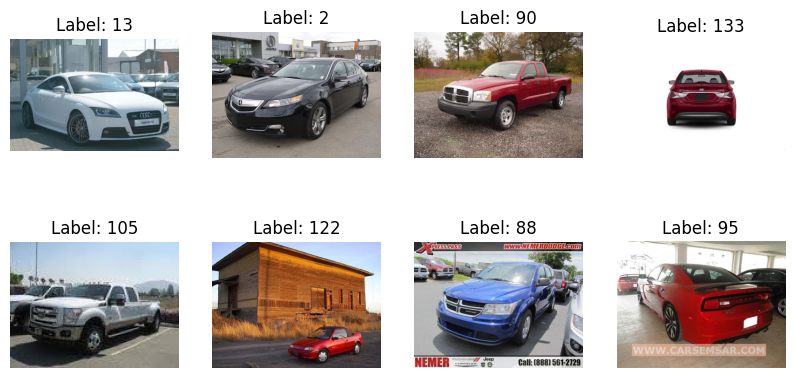

In [8]:
show_images(ds, num_images=8)

In [11]:
ds2 = torchvision.datasets.StanfordCars(data_dir, split='train', download=True, transform=torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)), torchvision.transforms.ToTensor()]))

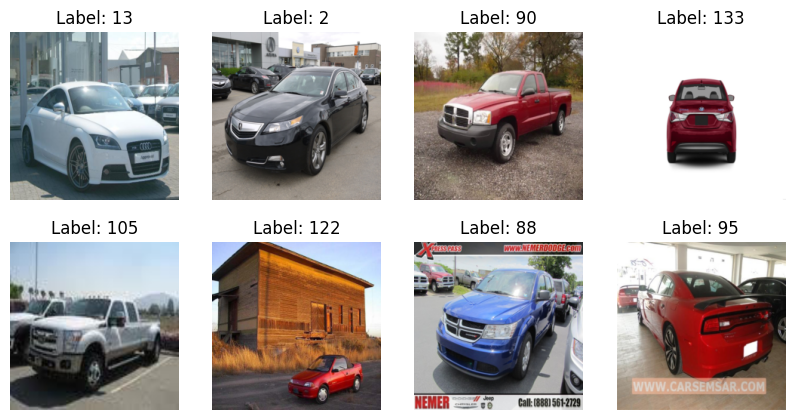

In [12]:
show_images(ds2, num_images=8)

In [16]:
import numpy as np
np.array([0.485, 0.456, 0.406])[:,None].tolist()

[[0.485], [0.456], [0.406]]